Basic Multi-Layer Perceptron

In [1]:
# Kick off by importing libraries, and outlining the Iris dataset
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import classification_report, confusion_matrix 

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [2]:
# Let's start by naming the features
names = ['text', 'subreddit', 'bucket', 'annotator', 'annotation', 'confidence']

In [3]:
# Reading the dataset through a Pandas function
df = pd.read_csv('final_mfrc_data.csv')  
df

,text,subreddit,bucket,annotator,annotation,confidence
0,That particular part of the debate is especial...,europe,French politics,annotator03,Non-Moral,Confident
1,That particular part of the debate is especial...,europe,French politics,annotator01,Purity,Confident
2,That particular part of the debate is especial...,europe,French politics,annotator02,Thin Morality,Confident
3,"/r/france is pretty lively, with it's own ling...",europe,French politics,annotator03,Non-Moral,Confident
4,"/r/france is pretty lively, with it's own ling...",europe,French politics,annotator00,Non-Moral,Somewhat Confident
...,...,...,...,...,...,...
61221,Well I can discern from your vehemence toward ...,AmItheAsshole,Everyday Morality,annotator05,Equality,Confident
61222,Kick! Punch! It's all in the mind. If you wann...,nostalgia,Everyday Morality,annotator05,Thin Morality,Somewhat Confident
61223,Reddit can’t help you this is some seriously t...,confession,Everyday Morality,annotator05,Thin Morality,Confident
61224,Yes. Disordered eating is insidious. And Rita ...,AmItheAsshole,Everyday Morality,annotator05,Non-Moral,Somewhat Confident


The Iris ataset has five columns. 
The task is to predict the class (which are the values in the fifth column) that the iris plant belongs to.

In [18]:
# Takes first 4 columns and assign them to variable "X"
X = df.iloc[:, 1:6]
# Takes first 5th columns and assign them to variable "Y". Object dtype refers to strings.
y = df.select_dtypes(include=[object])  
X = X.drop(columns=['annotator'])

In [19]:
X.head()

,subreddit,bucket,annotation,confidence
0,europe,French politics,Non-Moral,Confident
1,europe,French politics,Purity,Confident
2,europe,French politics,Thin Morality,Confident
3,europe,French politics,Non-Moral,Confident
4,europe,French politics,Non-Moral,Somewhat Confident


In [20]:
y = y.drop(columns=['text','subreddit','bucket','annotation','confidence'])
y.head()

,annotator
0,annotator03
1,annotator01
2,annotator02
3,annotator03
4,annotator00


In [21]:
# y actually contains all categories or classes:
y.annotator.unique()

array(['annotator03', 'annotator01', 'annotator02', 'annotator00',
       'annotator04', 'annotator05'], dtype=object)

In [22]:
# Now transforming categorial into numerical values
le = preprocessing.LabelEncoder()
y = y.apply(le.fit_transform)

In [23]:
y.head()

,annotator
0,3
1,1
2,2
3,3
4,0


In [24]:
X = X.apply(le.fit_transform)
X.head()

,subreddit,bucket,annotation,confidence
0,4,1,75,0
1,4,1,101,0
2,4,1,125,0
3,4,1,75,0
4,4,1,75,2


In [25]:
# Now for train and test split (80% of  dataset into  training set and  other 20% into test data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  

In [26]:
# Feature scaling
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [27]:
# Finally for the MLP- Multilayer Perceptron
mlp = MLPClassifier(hidden_layer_sizes=(50, 50, 50), max_iter=10000)  
mlp.fit(X_train, y_train.values.ravel())  

MLPClassifier(hidden_layer_sizes=(50, 50, 50), max_iter=10000)

In [28]:
predictions = mlp.predict(X_test) 

In [29]:
print(predictions)

[4 4 1 ... 0 3 2]


In [30]:
# Last thing: evaluation of algorithm performance in classifying flowers
matrix = confusion_matrix(y_test,predictions)
print(matrix)  
print(classification_report(y_test,predictions))  

[[1746    6  267  207   23   38]
 [ 303  770  881  235  249   33]
 [  95  211 1520  303  272   15]
 [ 193  191 1336  516  133   23]
 [  73  221   27   39 2044   10]
 [  60   32   12   27   86   49]]
              precision    recall  f1-score   support

           0       0.71      0.76      0.73      2287
           1       0.54      0.31      0.39      2471
           2       0.38      0.63      0.47      2416
           3       0.39      0.22      0.28      2392
           4       0.73      0.85      0.78      2414
           5       0.29      0.18      0.23       266

    accuracy                           0.54     12246
   macro avg       0.50      0.49      0.48     12246
weighted avg       0.54      0.54      0.52     12246



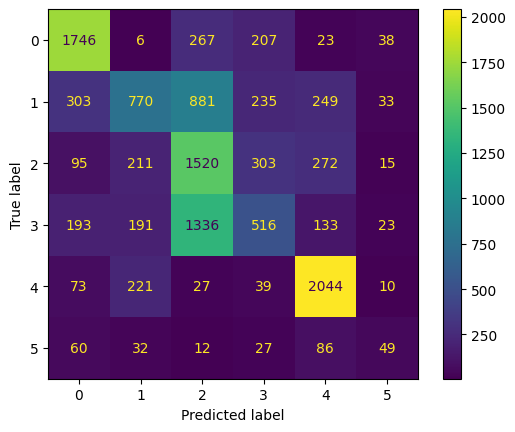

In [31]:
sklearn.metrics.ConfusionMatrixDisplay(matrix).plot()